# Linear Regression

In [1]:
#Import libs
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
np.random.seed(42)

## Load data into a Pandas dataframe

In [3]:
dt = pd.read_csv("homework3_input_data.csv")
dt

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
dt.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


## Plot all independent variables vs. the dependent variable

In [5]:
#Load X independent variables:
# Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, 
# Trust (Government Corruption), Generosity, Dystopia Residual.
X = dt.drop(['Happiness Rank', 'Happiness Score', 'Country','Region','Standard Error'], axis=1)
X

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [6]:
# load Y the predictor variable (Happiness Score)
Y = dt['Happiness Score']
dtY = pd.DataFrame({'Y':Y}, columns=['Y'])
dtY

,Y
0,7.587
1,7.561
2,7.527
3,7.522
4,7.427
...,...
153,3.465
154,3.340
155,3.006
156,2.905


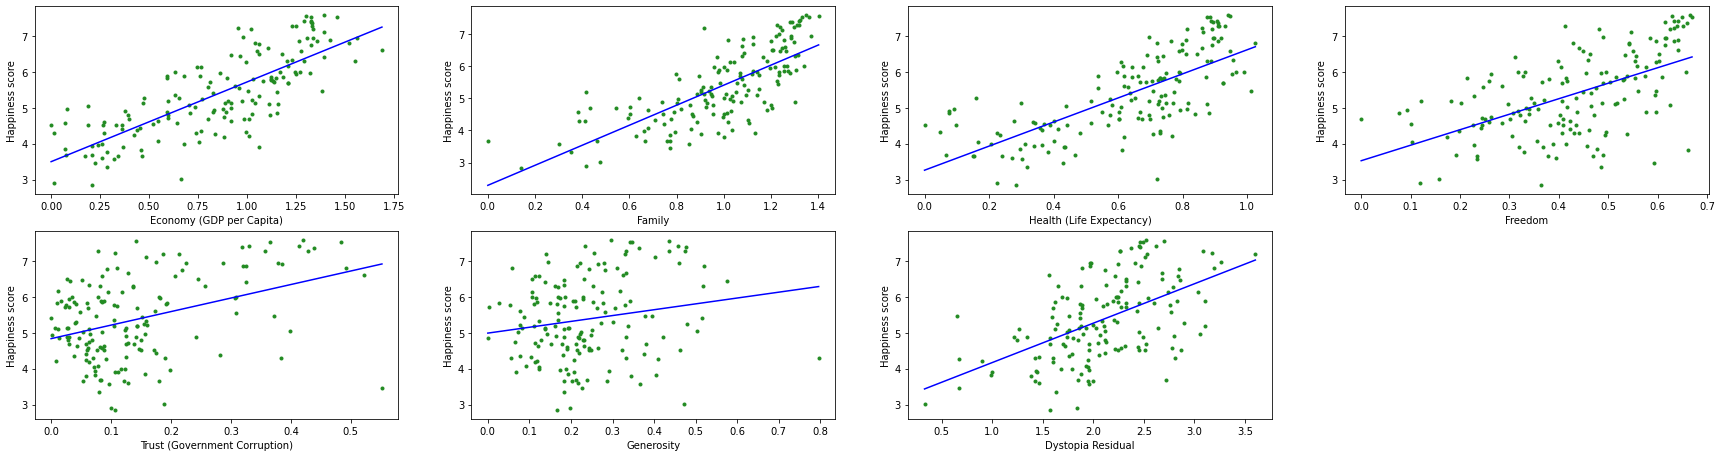

In [7]:
plt.figure(figsize=(30,20))
for i, col in enumerate(dt.columns[5:12]):
    plt.subplot(5, 4, i+1)
    x = dt[col]
    y = dt['Happiness Score']
    plt.plot(x, y, '.', color="forestgreen")
    # create linear regression line:
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color="b")
    plt.xlabel(col)
    plt.ylabel('Happiness score')

## Compute and plot a correlation matrix between the independent variables

<AxesSubplot:>

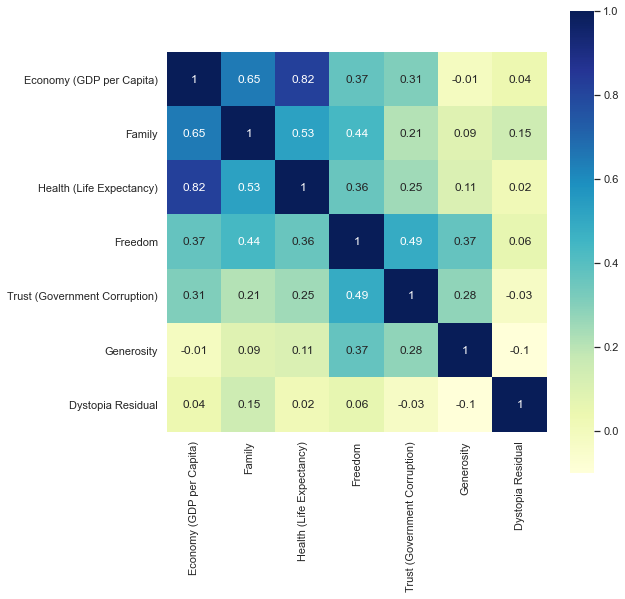

In [8]:
features = dt[['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']]
sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(features.corr().round(2), square=True, cmap='YlGnBu', annot=True)

## Break the data into the training and test datasets.

In [9]:
# Ratio: 80/20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape


((126, 7), (126,), (32, 7), (32,))

In [10]:
X_train

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
16,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034,1.96961
130,0.01604,0.41134,0.22562,0.43054,0.06977,0.33128,2.80791
134,0.88180,0.74700,0.61712,0.17288,0.06324,0.11291,1.59927
22,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131
93,0.08308,1.02626,0.09131,0.34037,0.15603,0.22269,3.05137
...,...,...,...,...,...,...,...
9,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
103,1.12094,1.20215,0.75905,0.32112,0.02758,0.12800,1.24074
67,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
117,0.52107,1.01404,0.36878,0.10081,0.14660,0.19062,2.20857


In [11]:
Y_train

16     6.946
130    4.292
134    4.194
22     6.810
93     4.971
       ...  
9      7.284
103    4.800
67     5.605
117    4.550
47     5.975
Name: Happiness Score, Length: 126, dtype: float64

### Use nonregularized linear regression

In [12]:
# Train a linear regression model to predict the output/dependent variable (Happiness Score)
model = linear_model.LinearRegression().fit(X_train, Y_train)

# The coefficients:
print('Coefficients: \n', model.coef_)
Y_test_pred = model.predict(X_test)

Coefficients: 
 [1.00010263 0.99995379 0.99986239 0.99968513 0.99990488 0.9999532
 1.00003023]


## mean squared error and coefficient of determination

In [13]:
# The mean squared error:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))

# The coefficient of determination (1 is perfect prediction):
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred))

Mean squared error: 0.00
Coefficient of determination: 1.00


Text(0, 0.5, 'Predicted Y')

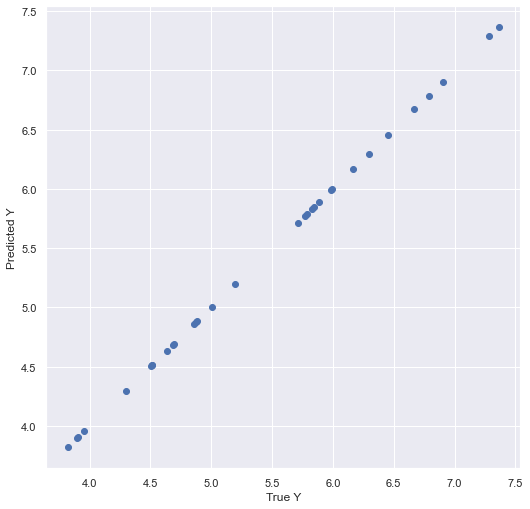

In [14]:
plt.scatter(Y_test,Y_test_pred)
plt.xlabel('True Y')
plt.ylabel('Predicted Y')